# Trader-Sentiment Analysis
Open this notebook in Google Colab.


Trader data columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp']
Sentiment data columns: ['timestamp', 'value', 'classification', 'date']


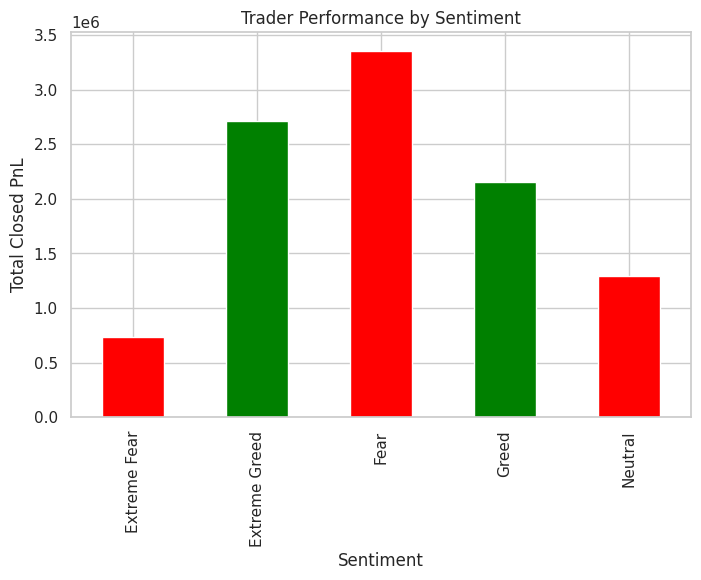

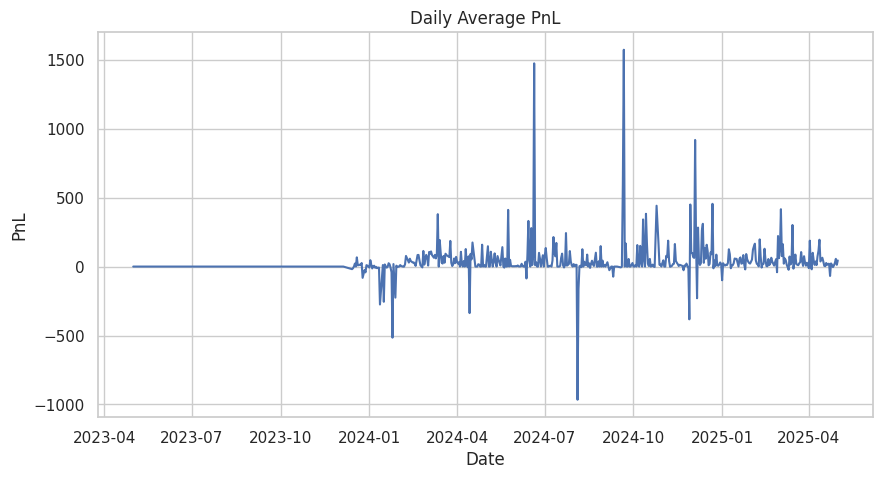

✅ Analysis complete. Outputs saved in /csv_files and /outputs.


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# --- Make folders ---
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# --- 1. Load data ---
df_trader = pd.read_csv("/content/historical_data.csv")
df_sentiment = pd.read_csv("/content/fear_greed_index.csv")

# --- 2. Normalize column names ---
df_trader.columns = df_trader.columns.str.strip().str.lower()
df_sentiment.columns = df_sentiment.columns.str.strip().str.lower()

print("Trader data columns:", df_trader.columns.tolist())
print("Sentiment data columns:", df_sentiment.columns.tolist())

# --- 3. Convert timestamps ---
df_trader["date"] = pd.to_datetime(
    df_trader["timestamp ist"],
    format="%d-%m-%Y %H:%M",  # day-first format
    errors="coerce"
).dt.date

df_sentiment["date"] = pd.to_datetime(
    df_sentiment["date"],
    errors="coerce"
).dt.date

# --- 4. Merge datasets ---
df_merged = pd.merge(df_trader, df_sentiment, on="date", how="inner")

# --- 5. Analysis ---
sentiment_pnl = df_merged.groupby("classification")["closed pnl"].sum()
daily_pnl = df_merged.groupby("date")["closed pnl"].mean()

# --- 6. Plots ---
plt.figure(figsize=(8,5))
sentiment_pnl.plot(kind="bar", color=["red","green"])
plt.title("Trader Performance by Sentiment")
plt.ylabel("Total Closed PnL")
plt.xlabel("Sentiment")
plt.savefig("outputs/sentiment_pnl.png")
plt.show()

plt.figure(figsize=(10,5))
daily_pnl.plot()
plt.title("Daily Average PnL")
plt.ylabel("PnL")
plt.xlabel("Date")
plt.savefig("outputs/daily_pnl.png")
plt.show()

# --- 7. Save outputs ---
df_merged.to_csv("csv_files/merged_trader_sentiment.csv", index=False)
sentiment_pnl.to_csv("csv_files/sentiment_pnl_report.csv")

print("✅ Analysis complete. Outputs saved in /csv_files and /outputs.")

